In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

In [5]:
df = pd.read_csv('Filled Data.csv')
df.head()

,Unnamed: 0,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,measles,bmi,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,0,54.8,2000.0,316.0496,0.098245,0.011050,0.01,62.0,6532.0,21.7,...,-5362.087825,5.333366,2.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,55.3,2001.0,307.2416,0.095925,0.010625,0.01,63.0,8762.0,21.8,...,-4738.217745,5.347639,2.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,56.2,2002.0,292.3430,0.093330,0.010130,0.01,64.0,2486.0,21.9,...,870.000000,9.443390,2.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,56.7,2003.0,286.4569,0.090470,0.009655,0.01,65.0,798.0,22.0,...,920.000000,8.941260,2.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,57.0,2004.0,281.8943,0.087595,0.009210,0.02,67.0,466.0,22.1,...,920.000000,9.808470,2.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [6]:
print("Total null values excluding inexplicit nulls")
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

Total null values excluding inexplicit nulls


,Total Null Val,Null Value %


In [7]:
df1 = df.copy()
df1.columns

Index(['Unnamed: 0', 'life_expectancy', 'year', 'adult_mortality',
       'infant_mortality', '1-4_mortality', 'alcohol', 'hep_b', 'measles',
       'bmi', 'polio', 'health_gov_expendt%', 'dtp3', 'hiv_aids', 'gdp',
       'population', '5_19thinness', '5_19obesity', 'hdi', 'schooling',
       'drinking_water', 'national_income_capita', 'health_expenditure%_gdp',
       'obesity_adlts', 'region_Europe & Central Asia',
       'region_Latin America & Caribbean', 'region_Middle East & North Africa',
       'region_North America', 'region_South Asia',
       'region_Sub-Saharan Africa', 'status_Developing'],
      dtype='object')

In [8]:
df1 = df1.drop(['Unnamed: 0', 'region_Europe & Central Asia', 'region_Latin America & Caribbean', 'region_Middle East & North Africa', 'region_North America', 'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing'], axis = 1)

MinMaxScaler

In [9]:
variables = df1.columns

In [10]:
mm_scaler = preprocessing.MinMaxScaler()
df1_mm = mm_scaler.fit_transform(df1)
df1_mm = pd.DataFrame(df1_mm, columns=variables)
df1_mm.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,measles,bmi,polio,...,gdp,population,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,0.316,0.000000,0.411642,0.617527,0.319566,0.104476,0.642373,0.030785,0.154472,0.218750,...,0.065206,0.023488,0.732143,0.124014,0.314008,0.265700,0.103735,0.063190,0.222207,0.088496
1,0.326,0.066667,0.398034,0.604137,0.309255,0.104476,0.652013,0.041295,0.162602,0.333333,...,0.065229,0.024070,0.725000,0.127504,0.315866,0.285024,0.104024,0.067713,0.222943,0.090512
2,0.344,0.133333,0.375016,0.589160,0.297245,0.104476,0.661653,0.011716,0.170732,0.343750,...,0.065781,0.024771,0.717857,0.130994,0.316795,0.299517,0.128065,0.108370,0.434192,0.094545
3,0.354,0.200000,0.365922,0.572654,0.285721,0.104476,0.671293,0.003761,0.178862,0.395833,...,0.065867,0.025531,0.710714,0.134484,0.346524,0.314010,0.152114,0.108733,0.408294,0.096562
4,0.360,0.266667,0.358873,0.556061,0.274924,0.104977,0.690574,0.002196,0.186992,0.020833,...,0.066027,0.026268,0.703571,0.137974,0.353956,0.328502,0.176356,0.108733,0.453022,0.100595


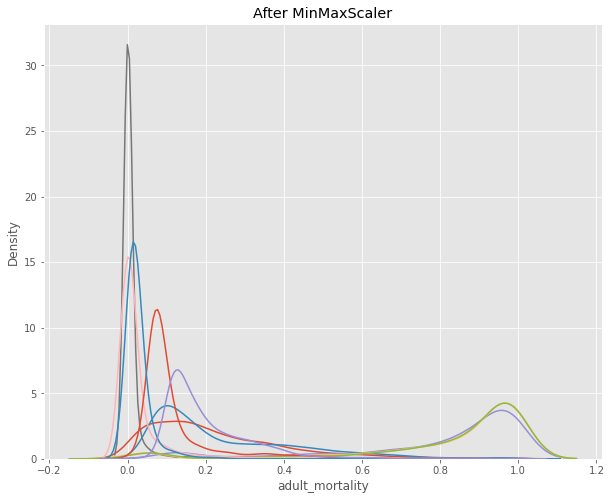

In [11]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df1_mm['adult_mortality'], ax=ax1)
sns.kdeplot(df1_mm['infant_mortality'], ax=ax1)
sns.kdeplot(df1_mm['hep_b'], ax=ax1)
sns.kdeplot(df1_mm['measles'], ax=ax1)
sns.kdeplot(df1_mm['polio'], ax=ax1)
sns.kdeplot(df1_mm['dtp3'], ax=ax1);
sns.kdeplot(df1_mm['hiv_aids'], ax=ax1);
sns.kdeplot(df1_mm['gdp'], ax=ax1);
sns.kdeplot(df1_mm['population'], ax=ax1);
sns.kdeplot(df1_mm['national_income_capita'], ax=ax1);

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

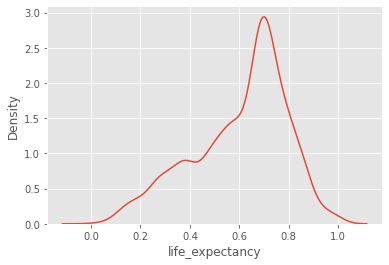

In [12]:
sns.kdeplot(df1_mm['life_expectancy'])

Robust Scaler

In [13]:
r_scaler = preprocessing.RobustScaler()
df1_r = r_scaler.fit_transform(df1)
df1_r = pd.DataFrame(df1_r, columns=variables)
df1_r.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,measles,bmi,polio,...,gdp,population,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,-1.373016,-1.000000,1.036824,1.784105,2.153896,-0.555961,-1.069795,17.984817,-1.18750,-3.584416,...,-0.272009,0.542430,2.709677,-0.656716,-1.151361,-1.604651,-2.363479,-0.784559,-0.112237,-0.938776
1,-1.333333,-0.866667,0.975893,1.730891,2.063508,-0.555961,-1.029795,24.140787,-1.15625,-3.012987,...,-0.271525,0.578825,2.677419,-0.641791,-1.144558,-1.511628,-2.362540,-0.749263,-0.108168,-0.931973
2,-1.261905,-0.733333,0.872830,1.671369,1.958232,-0.555961,-0.989795,6.815735,-1.12500,-2.961039,...,-0.259917,0.622570,2.645161,-0.626866,-1.141156,-1.441860,-2.284644,-0.431966,1.059313,-0.918367
3,-1.222222,-0.600000,0.832112,1.605769,1.857210,-0.555961,-0.949795,2.155970,-1.09375,-2.701299,...,-0.258121,0.670099,2.612903,-0.611940,-1.032313,-1.372093,-2.206718,-0.429137,0.916183,-0.911565
4,-1.198413,-0.466667,0.800549,1.539825,1.762569,-0.554455,-0.869795,1.239476,-1.06250,-4.571429,...,-0.254753,0.716133,2.580645,-0.597015,-1.005102,-1.302326,-2.128168,-0.429137,1.163378,-0.897959


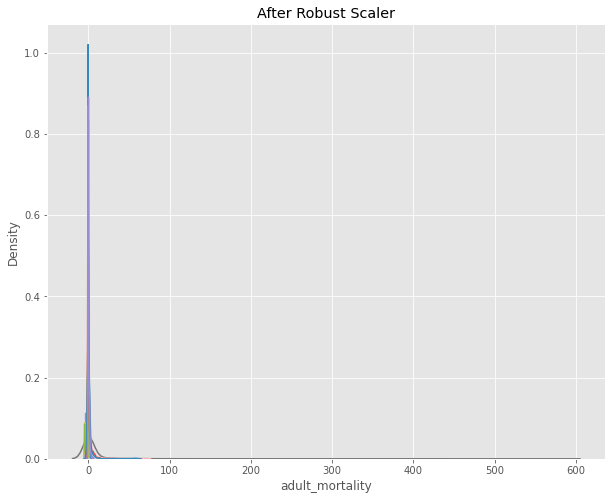

In [14]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Robust Scaler')

sns.kdeplot(df1_r['adult_mortality'], ax=ax1)
sns.kdeplot(df1_r['infant_mortality'], ax=ax1)
sns.kdeplot(df1_r['hep_b'], ax=ax1)
sns.kdeplot(df1_r['measles'], ax=ax1)
sns.kdeplot(df1_r['polio'], ax=ax1)
sns.kdeplot(df1_r['dtp3'], ax=ax1);
sns.kdeplot(df1_r['hiv_aids'], ax=ax1);
sns.kdeplot(df1_r['gdp'], ax=ax1);
sns.kdeplot(df1_r['population'], ax=ax1);
sns.kdeplot(df1_r['national_income_capita'], ax=ax1);

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

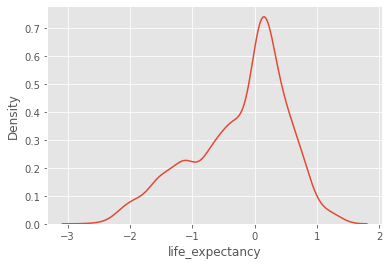

In [15]:
sns.kdeplot(df1_r['life_expectancy'])

Standard Scaler

In [16]:
s_scaler = preprocessing.StandardScaler()
df1_s = s_scaler.fit_transform(df1)
df1_s = pd.DataFrame(df1_s, columns=variables)
df1_s.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,measles,bmi,polio,...,gdp,population,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,-1.518840,-1.626978,1.056456,2.134398,1.432960,-1.135441,-0.631731,0.357379,-1.479605,-2.496523,...,-0.510830,-0.117845,3.245658,-1.151099,-1.355337,-1.912033,-2.841470,-1.199944,-0.293021,-1.429489
1,-1.466227,-1.410048,0.979460,2.058560,1.351609,-1.135441,-0.592465,0.551562,-1.434280,-2.026720,...,-0.510616,-0.111784,3.202934,-1.128752,-1.345964,-1.794400,-2.840166,-1.161405,-0.287238,-1.418365
2,-1.371524,-1.193118,0.849222,1.973731,1.256859,-1.135441,-0.553198,0.005063,-1.388956,-1.984010,...,-0.505478,-0.104500,3.160211,-1.106404,-1.341277,-1.706175,-2.732009,-0.814969,1.372379,-1.396118
3,-1.318912,-0.976187,0.797768,1.880241,1.165937,-1.135441,-0.513932,-0.141924,-1.343631,-1.770463,...,-0.504683,-0.096585,3.117487,-1.084057,-1.191301,-1.617950,-2.623810,-0.811881,1.168914,-1.384994
4,-1.287344,-0.759257,0.757883,1.786260,1.080758,-1.132942,-0.435399,-0.170834,-1.298307,-3.308002,...,-0.503192,-0.088920,3.074764,-1.061710,-1.153807,-1.529724,-2.514745,-0.811881,1.520311,-1.362746


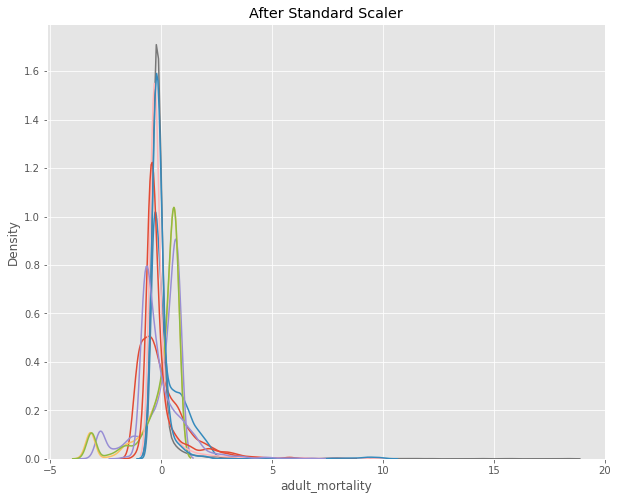

In [17]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Standard Scaler')

sns.kdeplot(df1_s['adult_mortality'], ax=ax1)
sns.kdeplot(df1_r['infant_mortality'], ax=ax1)
sns.kdeplot(df1_s['hep_b'], ax=ax1)
sns.kdeplot(df1_s['measles'], ax=ax1)
sns.kdeplot(df1_s['polio'], ax=ax1)
sns.kdeplot(df1_s['dtp3'], ax=ax1);
sns.kdeplot(df1_s['hiv_aids'], ax=ax1);
sns.kdeplot(df1_s['gdp'], ax=ax1);
sns.kdeplot(df1_s['population'], ax=ax1);
sns.kdeplot(df1_s['national_income_capita'], ax=ax1);

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

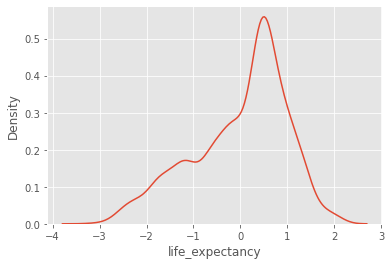

In [18]:
sns.kdeplot(df1_s['life_expectancy'])

In [19]:
df1_s.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,measles,bmi,polio,...,gdp,population,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,-1.518840,-1.626978,1.056456,2.134398,1.432960,-1.135441,-0.631731,0.357379,-1.479605,-2.496523,...,-0.510830,-0.117845,3.245658,-1.151099,-1.355337,-1.912033,-2.841470,-1.199944,-0.293021,-1.429489
1,-1.466227,-1.410048,0.979460,2.058560,1.351609,-1.135441,-0.592465,0.551562,-1.434280,-2.026720,...,-0.510616,-0.111784,3.202934,-1.128752,-1.345964,-1.794400,-2.840166,-1.161405,-0.287238,-1.418365
2,-1.371524,-1.193118,0.849222,1.973731,1.256859,-1.135441,-0.553198,0.005063,-1.388956,-1.984010,...,-0.505478,-0.104500,3.160211,-1.106404,-1.341277,-1.706175,-2.732009,-0.814969,1.372379,-1.396118
3,-1.318912,-0.976187,0.797768,1.880241,1.165937,-1.135441,-0.513932,-0.141924,-1.343631,-1.770463,...,-0.504683,-0.096585,3.117487,-1.084057,-1.191301,-1.617950,-2.623810,-0.811881,1.168914,-1.384994
4,-1.287344,-0.759257,0.757883,1.786260,1.080758,-1.132942,-0.435399,-0.170834,-1.298307,-3.308002,...,-0.503192,-0.088920,3.074764,-1.061710,-1.153807,-1.529724,-2.514745,-0.811881,1.520311,-1.362746


In [20]:
df1_s['year'].value_counts()

-0.542326    183
 0.759257    183
-1.410048    183
-1.193118    183
 0.325396    183
 0.542326    183
-1.626978    183
 0.976187    183
-0.325396    183
-0.759257    183
 1.193118    183
-0.976187    183
-0.108465    183
 1.626978    183
 1.410048    183
 0.108465    183
Name: year, dtype: int64

In [21]:
scaled_data = df[['region_Europe & Central Asia', 'region_Latin America & Caribbean', 'region_Middle East & North Africa', 'region_North America', 'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing']]
scaled_data.insert(0, 'sn', range(0, len(scaled_data)))

In [22]:
df1_s.insert(0, 'sn', range(0, len(df1_s)))

In [23]:
scaled_data = pd.merge(scaled_data, df1_s)
scaled_data = scaled_data.drop('sn', axis = 1)

In [24]:
scaled_data.head()

,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing,life_expectancy,year,adult_mortality,...,gdp,population,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.518840,-1.626978,1.056456,...,-0.510830,-0.117845,3.245658,-1.151099,-1.355337,-1.912033,-2.841470,-1.199944,-0.293021,-1.429489
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.466227,-1.410048,0.979460,...,-0.510616,-0.111784,3.202934,-1.128752,-1.345964,-1.794400,-2.840166,-1.161405,-0.287238,-1.418365
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.371524,-1.193118,0.849222,...,-0.505478,-0.104500,3.160211,-1.106404,-1.341277,-1.706175,-2.732009,-0.814969,1.372379,-1.396118
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.318912,-0.976187,0.797768,...,-0.504683,-0.096585,3.117487,-1.084057,-1.191301,-1.617950,-2.623810,-0.811881,1.168914,-1.384994
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.287344,-0.759257,0.757883,...,-0.503192,-0.088920,3.074764,-1.061710,-1.153807,-1.529724,-2.514745,-0.811881,1.520311,-1.362746


In [25]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,measles,bmi,polio,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,54.8,2000.0,316.0496,0.098245,0.011050,0.01,62.0,6532.0,21.7,24.0,...,-5362.087825,5.333366,2.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,55.3,2001.0,307.2416,0.095925,0.010625,0.01,63.0,8762.0,21.8,35.0,...,-4738.217745,5.347639,2.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,56.2,2002.0,292.3430,0.093330,0.010130,0.01,64.0,2486.0,21.9,36.0,...,870.000000,9.443390,2.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.7,2003.0,286.4569,0.090470,0.009655,0.01,65.0,798.0,22.0,41.0,...,920.000000,8.941260,2.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,57.0,2004.0,281.8943,0.087595,0.009210,0.02,67.0,466.0,22.1,5.0,...,920.000000,9.808470,2.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
scaled_data.to_csv('Scaled Data.csv')